pip install yfinance pandas numpy scikit-learn joblib matplotlib


In [11]:
import yfinance as yf
import pandas as pd
import numpy as np

symbol = "KAP.L"  # или "HSBK.L"

data = yf.download(
    symbol,
    start="2018-01-01",
    end="2024-12-01",
    auto_adjust=True
)
print(data.head())
print(data.tail())


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open   Volume
Ticker         KAP.L     KAP.L     KAP.L     KAP.L    KAP.L
Date                                                       
2018-11-13  7.749556  7.814135  7.684976  7.749556  1009977
2018-11-14  7.620396  7.801218  7.491237  7.749555   302578
2018-11-15  7.491236  7.749554  7.491236  7.684975   302872
2018-11-16  7.555817  7.684976  7.491237  7.678518   195136
2018-11-19  7.549358  7.620396  7.540317  7.549358    90593
Price           Close       High        Low       Open Volume
Ticker          KAP.L      KAP.L      KAP.L      KAP.L  KAP.L
Date                                                         
2024-11-25  38.002575  38.521864  37.860949  38.427449  59635
2024-11-26  38.096992  38.285826  37.813744  37.955370  20542
2024-11-27  37.483288  38.285825  36.822373  37.813744  43041
2024-11-28  37.530495  37.530495  37.058413  37.483287   9565
2024-11-29  38.191410  38.663492  37.152828  37.672121  39343


In [2]:
# train_model.ipynb (или .py)

import yfinance as yf
import pandas as pd
import numpy as np

symbol = "AAPL"

data = yf.download(symbol, start="2018-01-01", end="2024-12-01")
data.head()


/var/folders/bp/09h3qc1n4q381gr_7jbrhkw00000gn/T/ipykernel_53727/3062990191.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start="2018-01-01", end="2024-12-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.341892,40.351262,39.639317,39.850091,102223600
2018-01-03,40.334854,40.878181,40.271625,40.405112,118071600
2018-01-04,40.522213,40.625258,40.299731,40.407458,89738400
2018-01-05,40.983578,41.070228,40.526904,40.618239,94640000
2018-01-08,40.831356,41.126437,40.732992,40.831356,82271200


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

symbol = "AAPL"

data = yf.download(
    symbol,
    start="2018-01-01",
    end="2024-12-01",
    auto_adjust=True
)

print("Before:", data.columns)

# Если колонки — MultiIndex (Price / Ticker), убираем уровень Ticker
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(1)

print("After:", data.columns)
print(data.head())
print(data.tail())


[*********************100%***********************]  1 of 1 completed

Before: MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
After: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Price           Close       High        Low       Open     Volume
Date                                                             
2018-01-02  40.341892  40.351262  39.639317  39.850091  102223600
2018-01-03  40.334854  40.878181  40.271625  40.405112  118071600
2018-01-04  40.522213  40.625258  40.299731  40.407458   89738400
2018-01-05  40.983578  41.070228  40.526904  40.618239   94640000
2018-01-08  40.831356  41.126437  40.732992  40.831356   82271200
Price            Close        High         Low        Open    Volume
Date                                                                
2024-11-22  228.835037  229.681216  227.033189  227.033189  38168300
2024-11-25  231.821533  232.199827  2

In [4]:
data["return_1d"] = data["Close"].pct_change()
data["SMA_5"] = data["Close"].rolling(5).mean()
data["SMA_10"] = data["Close"].rolling(10).mean()
data["price_over_sma5"] = data["Close"] / data["SMA_5"]
data["target"] = (data["Close"].shift(-1) > data["Close"]).astype(int)

data = data.dropna().copy()


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

features = ["return_1d", "SMA_5", "SMA_10", "price_over_sma5"]
X = data[features]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))


joblib.dump(model, "model.joblib")
print("Model saved to model.joblib")

Classification report:
              precision    recall  f1-score   support

           0       0.44      0.67      0.53       156
           1       0.52      0.30      0.38       191

    accuracy                           0.46       347
   macro avg       0.48      0.48      0.45       347
weighted avg       0.48      0.46      0.45       347

Confusion matrix:
[[104  52]
 [134  57]]
Model saved to model.joblib


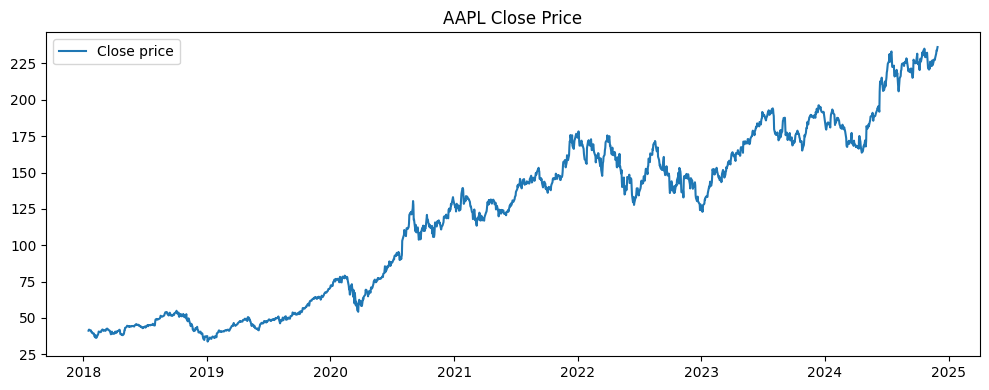

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(data.index, data["Close"], label="Close price")
plt.title("AAPL Close Price")
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
data.to_csv("aapl_dataset.csv")

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
/var/folders/bp/09h3qc1n4q381gr_7jbrhkw00000gn/T/ipykernel_53727/4288202704.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby("Symbol").apply(add_features)


Dataset shape: (8700, 6)
After features: (8655, 11)
Price           Close       High        Low       Open     Volume Symbol  \
Date                                                                       
2018-01-16  41.262260  42.011674  41.250550  41.662726  118263600   AAPL   
2018-01-17  41.943768  41.978895  40.999975  41.252899  137547200   AAPL   
2018-01-18  41.981224  42.177948  41.744692  42.006985  124773600   AAPL   
2018-01-19  41.793888  42.056182  41.547986  41.829015  129700400   AAPL   
2018-01-22  41.451954  41.634623  41.358279  41.522212  108434400   AAPL   

Price       return_1d      SMA_5     SMA_10  price_over_sma5  target  
Date                                                                  
2018-01-16  -0.005082  41.085677  40.844228         1.004298       1  
2018-01-17   0.016516  41.309097  41.004415         1.015364       1  
2018-01-18   0.000893  41.541885  41.169052         1.010576       0  
2018-01-19  -0.004462  41.690834  41.296220         1.002472

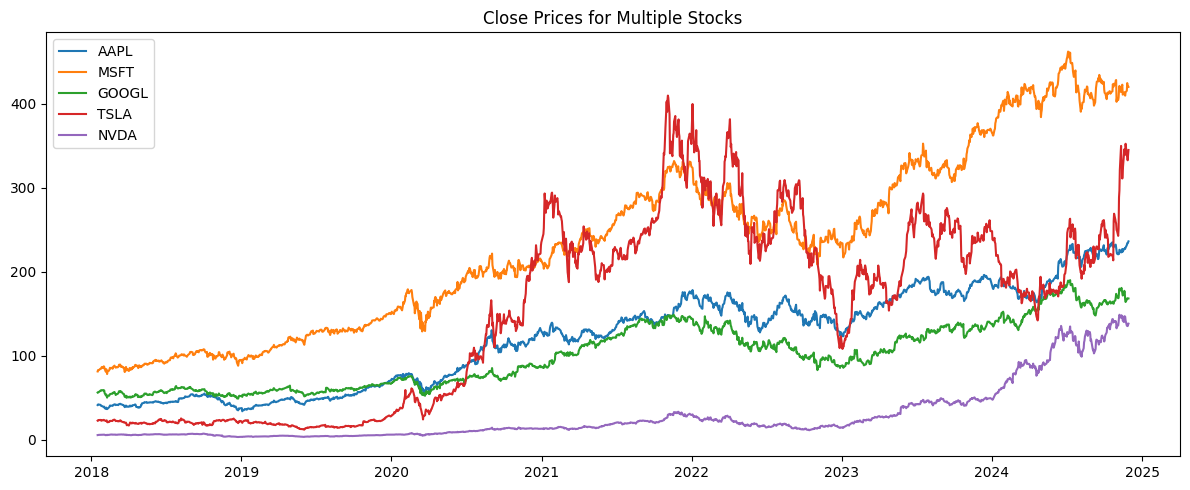

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# -------------------------------
# 1) Список тикеров
# -------------------------------
TICKERS = ["AAPL", "MSFT", "GOOGL", "TSLA", "NVDA"]

start_date = "2018-01-01"
end_date = "2024-12-01"

all_data = []

# -------------------------------
# 2) Скачиваем данные для всех тикеров
# -------------------------------
for symbol in TICKERS:
    print(f"Downloading {symbol}...")
    df = yf.download(
        symbol,
        start=start_date,
        end=end_date,
        auto_adjust=True
    )

    # Если MultiIndex → очищаем
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.droplevel(1)

    df["Symbol"] = symbol

    # Добавляем в общий список
    all_data.append(df)

# Объединяем все данные
data = pd.concat(all_data)
print("Dataset shape:", data.shape)

# -------------------------------
# 3) Feature engineering
# -------------------------------
def add_features(df):
    df["return_1d"] = df["Close"].pct_change()
    df["SMA_5"] = df["Close"].rolling(5).mean()
    df["SMA_10"] = df["Close"].rolling(10).mean()
    df["price_over_sma5"] = df["Close"] / df["SMA_5"]

    # Target: next-day direction
    df["target"] = (df["Close"].shift(-1) > df["Close"]).astype(int)

    return df

# Группируем по Symbol → считаем фичи для каждой компании отдельно
data = data.groupby("Symbol").apply(add_features)

# Убираем NaN
data = data.dropna().reset_index(level=0, drop=True)

print("After features:", data.shape)
print(data.head())

# -------------------------------
# 4) Обучение модели
# -------------------------------
features = ["return_1d", "SMA_5", "SMA_10", "price_over_sma5"]
X = data[features]
y = data["target"]

# Не перемешиваем, чтобы сохранять временной порядок!
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# -------------------------------
# 5) Отчёты
# -------------------------------
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# -------------------------------
# 6) Сохраняем модель
# -------------------------------
joblib.dump(model, "model1.joblib")
print("Model saved to model.joblib")

# -------------------------------
# 7) График цен всех тикеров
# -------------------------------
plt.figure(figsize=(12,5))
for symbol in TICKERS:
    subset = data[data["Symbol"] == symbol]
    plt.plot(subset.index, subset["Close"], label=symbol)

plt.title("Close Prices for Multiple Stocks")
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
data.to_csv("trading_dataset.csv")

In [10]:
data.shape

(8655, 11)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Dataset shape: (3276, 6)
After features: (3258, 11)
Price          Close      High       Low      Open  Volume  Symbol  return_1d  \
Date                                                                            
2018-01-15  4.391484  4.426900  4.391484  4.391484   16805  HSBK.L   0.016394   
2018-01-16  4.373776  4.373776  4.267531  4.373776    2867  HSBK.L  -0.004032   
2018-01-17  4.356069  4.356069  4.267531  4.267531    1684  HSBK.L  -0.004049   
2018-01-18  4.391484  4.391484  4.338362  4.356069   18870  HSBK.L   0.008130   
2018-01-19  4.391484  4.391484  4.356069  4.356069  110200  HSBK.L   0.000000   

Price          SMA_5    SMA_10  price_over_sma5  target  
Date                                                     
2018-01-15  4.239199  3.991292         1.035923       0  
2018-01-16  4.299405  4.069206         1.017298       0  
2018-01-17  4.341903  4.136495         1.003263       1  
2018-01-18  4.366693  4.202013         1.005677       0  
2018-01-19  4.380860  4.258677  


/var/folders/bp/09h3qc1n4q381gr_7jbrhkw00000gn/T/ipykernel_53727/1169453916.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby("Symbol").apply(add_features)


Classification report:
              precision    recall  f1-score   support

           0       0.53      0.90      0.67       338
           1       0.55      0.13      0.22       314

    accuracy                           0.53       652
   macro avg       0.54      0.52      0.44       652
weighted avg       0.54      0.53      0.45       652

Confusion matrix:
[[304  34]
 [272  42]]
Model saved to model.joblib


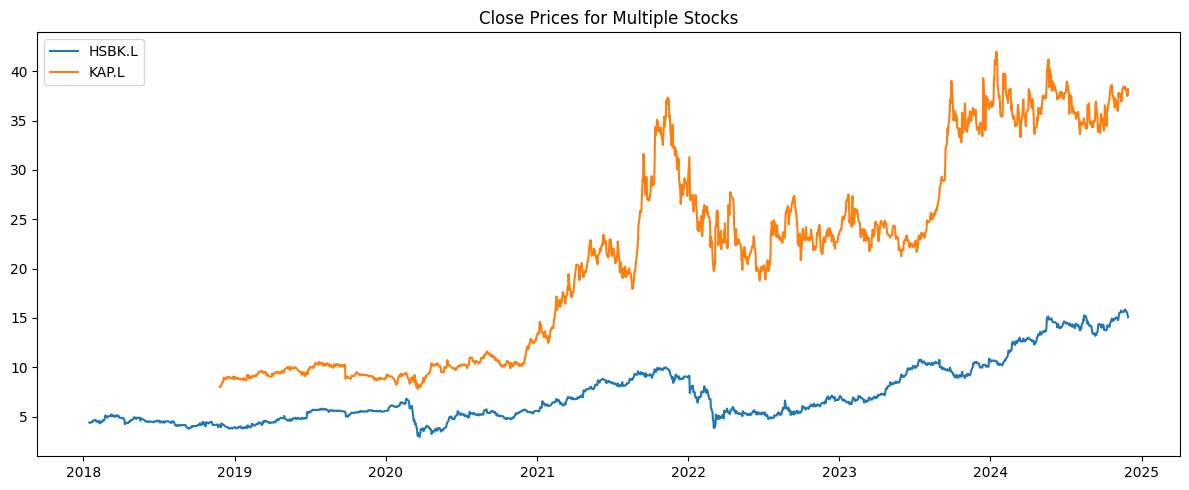

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# -------------------------------
# 1) Список тикеров
# -------------------------------
TICKERS = ["HSBK.L", "KAP.L"]

start_date = "2018-01-01"
end_date = "2024-12-01"

all_data = []

# -------------------------------
# 2) Скачиваем данные для всех тикеров
# -------------------------------
for symbol in TICKERS:
    print(f"Downloading {symbol}...")
    df = yf.download(
        symbol,
        start=start_date,
        end=end_date,
        auto_adjust=True
    )

    # Если MultiIndex → очищаем
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.droplevel(1)

    df["Symbol"] = symbol

    # Добавляем в общий список
    all_data.append(df)

# Объединяем все данные
data = pd.concat(all_data)
print("Dataset shape:", data.shape)

# -------------------------------
# 3) Feature engineering
# -------------------------------
def add_features(df):
    df["return_1d"] = df["Close"].pct_change()
    df["SMA_5"] = df["Close"].rolling(5).mean()
    df["SMA_10"] = df["Close"].rolling(10).mean()
    df["price_over_sma5"] = df["Close"] / df["SMA_5"]

    # Target: next-day direction
    df["target"] = (df["Close"].shift(-1) > df["Close"]).astype(int)

    return df

# Группируем по Symbol → считаем фичи для каждой компании отдельно
data = data.groupby("Symbol").apply(add_features)

# Убираем NaN
data = data.dropna().reset_index(level=0, drop=True)

print("After features:", data.shape)
print(data.head())

# -------------------------------
# 4) Обучение модели
# -------------------------------
features = ["return_1d", "SMA_5", "SMA_10", "price_over_sma5"]
X = data[features]
y = data["target"]

# Не перемешиваем, чтобы сохранять временной порядок!
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# -------------------------------
# 5) Отчёты
# -------------------------------
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# -------------------------------
# 6) Сохраняем модель
# -------------------------------
joblib.dump(model, "model2.joblib")
print("Model saved to model.joblib")

# -------------------------------
# 7) График цен всех тикеров
# -------------------------------
plt.figure(figsize=(12,5))
for symbol in TICKERS:
    subset = data[data["Symbol"] == symbol]
    plt.plot(subset.index, subset["Close"], label=symbol)

plt.title("Close Prices for Multiple Stocks")
plt.legend()
plt.tight_layout()
plt.show()
